In [1]:
import numpy as np
import matplotlib.pyplot as plt

from data.load_mnist import load_mnist
from core.network.twolayernet import BackPropagationNet
from core.layers import *

In [2]:
(X_train, T_train), (X_test, T_test) = load_mnist(normalize=True, one_hot_label=True)
train_size = X_train.shape[0]

## Activation Function variations

### Mish

In [3]:
mish_network = BackPropagationNet(784, 50, 10, activation_layer=Mish)

mish_iters_num = 10000
mish_batch_size = 100
mish_lr = 0.1

mish_train_loss_list = []
mish_train_acc_list = []
mish_test_acc_list = []

mish_iter_per_epoch = max(train_size / mish_batch_size, 1)

for i in range(mish_iters_num):
    batch_mask = np.random.choice(train_size, mish_batch_size)
    X_batch = X_train[batch_mask]
    T_batch = T_train[batch_mask]

    grad = mish_network.gradient(X_batch, T_batch)

    for key in ("W1", "B1", "W2", "B2"):
        mish_network.params[key] -= mish_lr * grad[key]

    loss = mish_network.loss(X_batch, T_batch)
    mish_train_loss_list.append(loss)

    if i % mish_iter_per_epoch == 0:
        mish_train_acc = mish_network.accuracy(X_train, T_train)
        mish_test_acc = mish_network.accuracy(X_test, T_test)
        mish_train_acc_list.append(mish_train_acc)
        mish_test_acc_list.append(mish_test_acc)

        print("train acc, test acc | " + str(mish_train_acc) + ", " + str(mish_test_acc))

train acc, test acc | 0.16368333333333332, 0.1588
train acc, test acc | 0.8796333333333334, 0.8841
train acc, test acc | 0.9028666666666667, 0.8998
train acc, test acc | 0.9264333333333333, 0.9258
train acc, test acc | 0.9377666666666666, 0.9339
train acc, test acc | 0.9422, 0.9409
train acc, test acc | 0.9415166666666667, 0.9377
train acc, test acc | 0.9510166666666666, 0.9454
train acc, test acc | 0.9562833333333334, 0.9516
train acc, test acc | 0.9543666666666667, 0.949
train acc, test acc | 0.9607166666666667, 0.956
train acc, test acc | 0.9619333333333333, 0.9556
train acc, test acc | 0.9637333333333333, 0.957
train acc, test acc | 0.9661333333333333, 0.9581
train acc, test acc | 0.9665, 0.9589
train acc, test acc | 0.9702833333333334, 0.9612
train acc, test acc | 0.9685833333333334, 0.9596


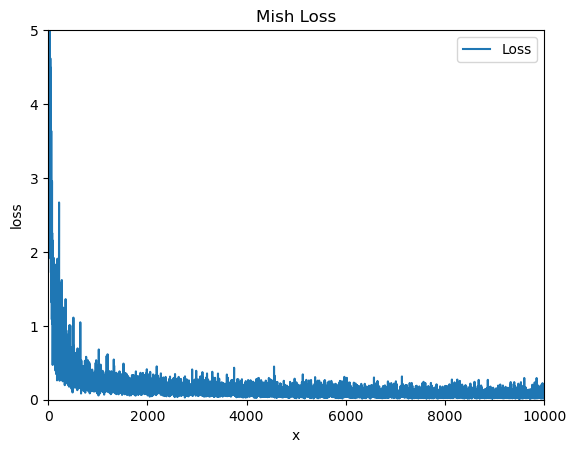

In [4]:
x = np.arange(len(mish_train_loss_list))
plt.plot(x, mish_train_loss_list, label="Loss")
plt.xlim(0, 10000)
plt.ylim(0, 5.0)
plt.xlabel("x")
plt.ylabel("loss")
plt.legend()
plt.title("Mish Loss")
plt.show()

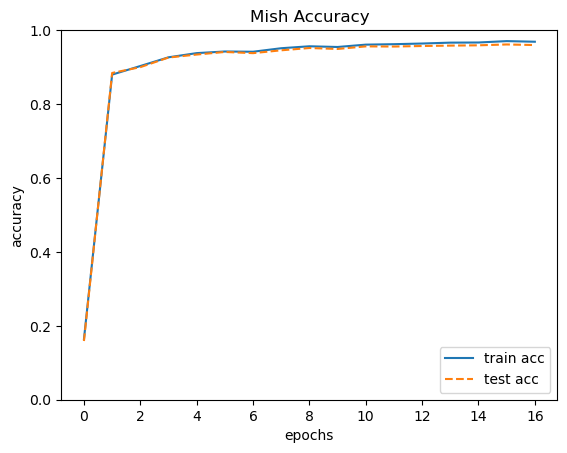

In [5]:
markers = {"train": "o", "test": "s"}

x = np.arange(len(mish_train_acc_list))

plt.plot(x, mish_train_acc_list, label="train acc")
plt.plot(x, mish_test_acc_list, label="test acc", linestyle="--")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc="lower right")
plt.title("Mish Accuracy")
plt.show()

In [6]:
print(f"final loss: {mish_train_loss_list[-1]}")
print(f"final train accuracy: {mish_train_acc_list[-1]}")
print(f"final test accuracy: {mish_test_acc_list[-1]}")

final loss: 0.15023812114656443
final train accuracy: 0.9685833333333334
final test accuracy: 0.9596


### Leaky ReLU

In [4]:
lrelu_network = BackPropagationNet(784, 50, 10, activation_layer=LeakyReLU)

lrelu_iters_num = 10000
lrelu_batch_size = 100
lrelu_lr = 0.1

lrelu_train_loss_list = []
lrelu_train_acc_list = []
lrelu_test_acc_list = []

lrelu_iter_per_epoch = max(train_size / lrelu_batch_size, 1)

for i in range(lrelu_iters_num):
    batch_mask = np.random.choice(train_size, lrelu_batch_size)
    X_batch = X_train[batch_mask]
    T_batch = T_train[batch_mask]

    grad = lrelu_network.gradient(X_batch, T_batch)

    for key in ("W1", "B1", "W2", "B2"):
        lrelu_network.params[key] -= lrelu_lr * grad[key]

    loss = lrelu_network.loss(X_batch, T_batch)
    lrelu_train_loss_list.append(loss)

    if i % lrelu_iter_per_epoch == 0:
        lrelu_train_acc = lrelu_network.accuracy(X_train, T_train)
        lrelu_test_acc = lrelu_network.accuracy(X_test, T_test)
        lrelu_train_acc_list.append(lrelu_train_acc)
        lrelu_test_acc_list.append(lrelu_test_acc)

        print("train acc, test acc | " + str(lrelu_train_acc) + ", " + str(lrelu_test_acc))

train acc, test acc | 0.10483333333333333, 0.1035
train acc, test acc | 0.13703333333333334, 0.138
train acc, test acc | 0.09928333333333333, 0.1032
train acc, test acc | 0.09751666666666667, 0.0974
train acc, test acc | 0.10218333333333333, 0.101
train acc, test acc | 0.09915, 0.1009
train acc, test acc | 0.10226666666666667, 0.1009
train acc, test acc | 0.13508333333333333, 0.1374
train acc, test acc | 0.0993, 0.1032
train acc, test acc | 0.09871666666666666, 0.098
train acc, test acc | 0.09871666666666666, 0.098
train acc, test acc | 0.09035, 0.0892
train acc, test acc | 0.10221666666666666, 0.101
train acc, test acc | 0.09871666666666666, 0.098
train acc, test acc | 0.09863333333333334, 0.0958
train acc, test acc | 0.09863333333333334, 0.0958
train acc, test acc | 0.09751666666666667, 0.0982


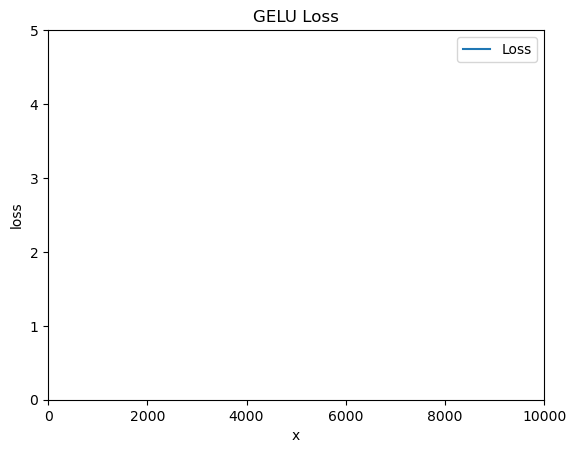

In [8]:
x = np.arange(len(lrelu_train_loss_list))
plt.plot(x, lrelu_train_loss_list, label="Loss")
plt.xlim(0, 10000)
plt.ylim(0, 5.0)
plt.xlabel("x")
plt.ylabel("loss")
plt.legend()
plt.title("GELU Loss")
plt.show()

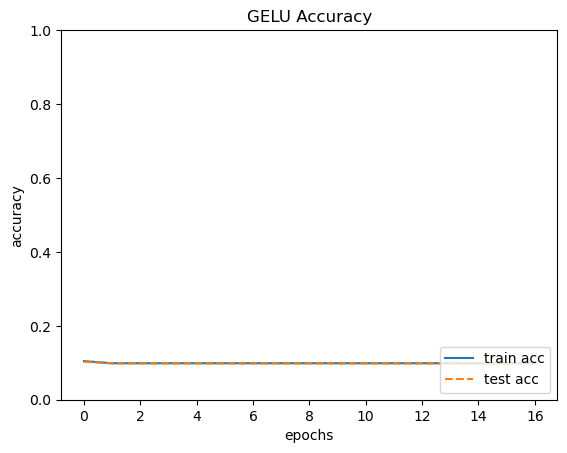

In [9]:
markers = {"train": "o", "test": "s"}

x = np.arange(len(lrelu_train_acc_list))

plt.plot(x, lrelu_train_acc_list, label="train acc")
plt.plot(x, lrelu_test_acc_list, label="test acc", linestyle="--")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc="lower right")
plt.title("GELU Accuracy")
plt.show()

In [10]:
print(f"final loss: {lrelu_train_loss_list[-1]}")
print(f"final train accuracy: {lrelu_train_acc_list[-1]}")
print(f"final test accuracy: {lrelu_test_acc_list[-1]}")

final loss: nan
final train accuracy: 0.09871666666666666
final test accuracy: 0.098
